In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os as os
from scipy.integrate import odeint
from scipy.optimize import minimize
import seaborn as sns
import random
from scipy.stats import ks_2samp, anderson_ksamp
from scipy.special import kl_div
from scipy.stats import wasserstein_distance
from sklearn.utils import resample

# Make plots look good 
%config InlineBackend.figure_format = 'svg'

In [13]:
!pip install --upgrade openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.5
    Uninstalling openpyxl-3.0.5:
      Successfully uninstalled openpyxl-3.0.5


In [17]:
# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/96well_experiment_1.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

                     96well_1_1cell  96well_2_1cell  96well_1_2cell  \
2021-02-10 00:00:00                                                   
Expanding                         1               0               4   
Committed                         8               9              49   
Undetermined                      0               1               1   

                     96well_2_2cell  96well_1_3cell  96well_2_3cell  
2021-02-10 00:00:00                                                  
Expanding                         5               2               4  
Committed                        51              57              45  
Undetermined                      1               1               8  


96well_1_1cell    1
96well_2_1cell    0
Name: Expanding, dtype: int64

5.555555555555555 5.555555555555555
94.44444444444444 5.555555555555557
5.555555555555555 5.555555555555555


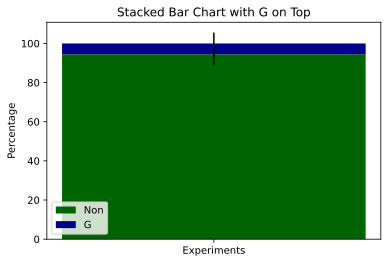

In [27]:

# Create lists for each population
G = df.loc['Expanding'][0:2]
Non = df.loc['Committed'][0:2]
Na = df.loc['Undetermined'][0:2]

# Calculate the total counts for each plate
totals = [sum(x) for x in zip(G, Non)]#, Na)]

# Calculate the percentage of each population for each plate
G_percent = [i / j * 100 for i, j in zip(G, totals)]
Non_percent = [i / j * 100 for i, j in zip(Non, totals)]
Na_percent = [i / j * 100 for i, j in zip(Na, totals)]

# Calculate the mean percentage for each population
G_mean = np.mean(G_percent)
Non_mean = np.mean(Non_percent)
Na_mean = np.mean(Na_percent)

# Calculate the standard deviation for each population
G_std = np.std(G_percent)
Non_std = np.std(Non_percent)
Na_std = np.std(Na_percent)

print(G_mean,G_std)
print(Non_mean,Non_std)
print(Na_mean,Na_std)

# Set up the figure and axis
fig, ax = plt.subplots()

# The x-axis positions for the bars
bar_positions = np.arange(1)

# Width of the bars
bar_width = 0.5

# path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_A_1.pdf'

# with PdfPages(path_to_save) as pdf:

# Plot the bars and error bars for each population
ax.bar(bar_positions, Non_mean, width=bar_width, label='Non', yerr=Non_std,color = ["#006400"])
#ax.bar(bar_positions, Na_mean, bottom=Non_mean, width=bar_width, label='NaN', yerr=Na_std)
ax.bar(bar_positions, G_mean, bottom=np.add(Non_mean, 0), width=bar_width, label='G', yerr=G_std,color = ['#00008B'])

# Customize the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Experiments'])
ax.set_ylabel('Percentage')
ax.set_title('Stacked Bar Chart with G on Top')
ax.legend()

# Show the plot
plt.show()
#     pdf.savefig(fig)

                     96well_1_1cell  96well_2_1cell  96well_1_2cell  \
2021-02-10 00:00:00                                                   
Expanding                         1               0               4   
Committed                         8               9              49   
Undetermined                      0               1               1   

                     96well_2_2cell  96well_1_3cell  96well_2_3cell  
2021-02-10 00:00:00                                                  
Expanding                         5               2               4  
Committed                        51              57              45  
Undetermined                      1               1               8  


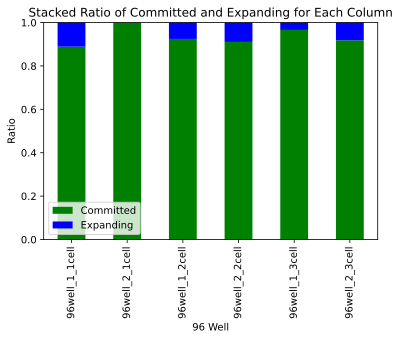

In [46]:
plate_numb = '96well_experiment_1'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()

    pdf.savefig(fig)

                     96well_1_1cell  96well_2_1cell  96well_1_2cell  \
2021-02-23 00:00:00                                                   
Expanding                         1               1               3   
Committed                         9              11              42   
Undetermined                      0               1               2   

                     96well_2_2cell  96well_1_3cell  96well_2_3cell  
2021-02-23 00:00:00                                                  
Expanding                         6               4               5  
Committed                        53              48              45  
Undetermined                      0               4               1  


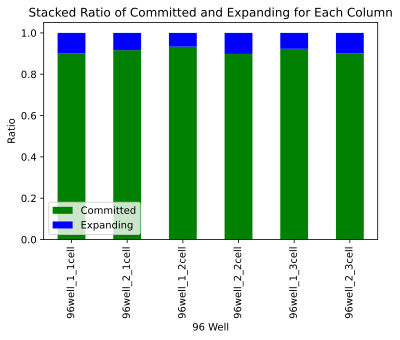

In [48]:
plate_numb = '96well_experiment_2'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()

    pdf.savefig(fig)

              96well_1  96well_2  96well_3
Mar-05-2023                               
Expanding            1         3         4
Committed           23        33        27
Undetermined         3         1         0


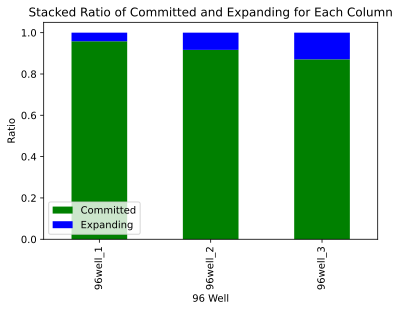

In [49]:
plate_numb = '96well_experiment_3'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()

    pdf.savefig(fig)

              96well_1  96well_2  96well_3  96well_4  Replate Committed  \
Aug-12-2021                                                               
Expanding            2         5         2         4                  0   
Committed           20        29        24        32                 20   
Undetermined         3         4         2         1                  0   

              Replate Committed.1  Replate Committed.2  Replate Expanding  \
Aug-12-2021                                                                 
Expanding                       0                    0                  2   
Committed                      20                   24                 15   
Undetermined                    0                    0                  0   

              Replate Expanding.1  Replate Expanding.2  
Aug-12-2021                                             
Expanding                       6                    4  
Committed                      18                   21  
Undetermin

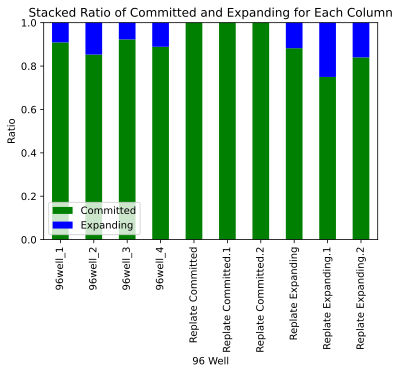

In [54]:
plate_numb = '96well_replating_experiment_1'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

    pdf.savefig(fig)

                     96well_1_1cell  96well_2_1cell  96well_1_2cell  \
2021-01-29 00:00:00                                                   
Expanding                         3               3               3   
Committed                        27              28              24   
Undetermined                      2               2               4   

                     96well_2_2cell  96well_1_3cell  96well_2_3cell  \
2021-01-29 00:00:00                                                   
Expanding                         3               2               1   
Committed                        26               6               5   
Undetermined                      3               2               2   

                     96well_1_4cell  Replate_1  Replate_2  
2021-01-29 00:00:00                                        
Expanding                         1          1          1  
Committed                         3          8          8  
Undetermined                      0          0  

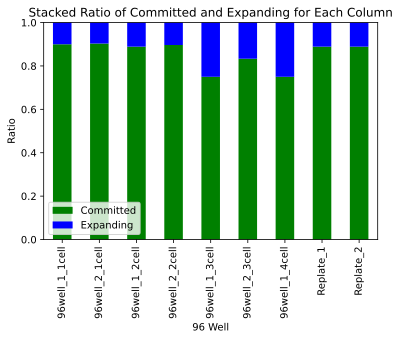

In [53]:
plate_numb = '96well_replating_experiment_2'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.ylim(0, 1) 
    plt.show()

    pdf.savefig(fig)

              96well_1  96well_2  96well_3  96well_4  Replate_1  Replate_2
Jan-18-2022                                                               
Expanding            2         2         4         3          5          4
Committed           11        11        22        23         65         54
Undetermined         1         3         1         4          3          1


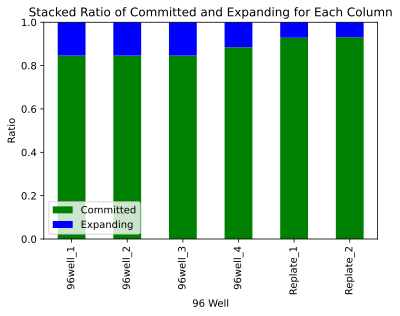

In [55]:
plate_numb = '96well_replating_experiment_3'

# Specify the path to your Excel file
excel_file = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb + '.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

# Calculate the total of 'Committed' and 'Expanding' for each column
total = df.loc['Committed'] + df.loc['Expanding']

# Calculate the ratios
ratio_committed = df.loc['Committed'] / total
ratio_expanding = df.loc['Expanding'] / total


path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/' + plate_numb +'.pdf'
with PdfPages(path_to_save) as pdf:

    # Plotting
    fig, ax = plt.subplots()
    ratio_committed.plot(kind='bar', color='green', ax=ax, label='Committed')
    ratio_expanding.plot(kind='bar', color='blue', ax=ax, bottom=ratio_committed, label='Expanding')

    plt.title('Stacked Ratio of Committed and Expanding for Each Column')
    plt.xlabel('96 Well')
    plt.ylabel('Ratio')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

    pdf.savefig(fig)